In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('phishing-dataset.csv')
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
df.duplicated().sum()

5206

In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
X = df.drop('Result', axis=1)
y = df['Result']

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# X.shape
# y.shape

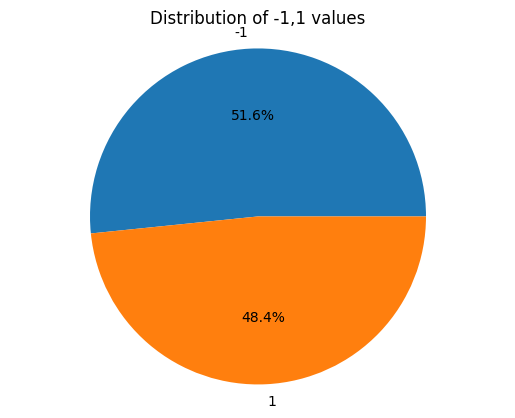

In [7]:
plt.pie(df['Result'].value_counts(), labels=df['Result'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of -1,1 values')
plt.show()

In [8]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train dataset shape:', X_train.shape)
print('Test dataset shape:', X_test.shape)

Train dataset shape: (4094, 30)
Test dataset shape: (1755, 30)


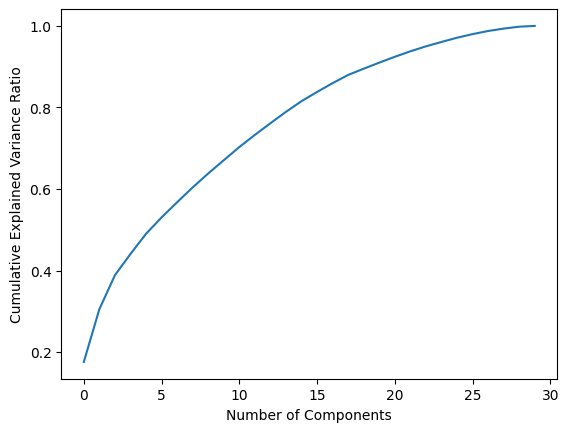

Optimal Number of Components: 24


In [9]:
pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

optimal_num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_num_components}")

## Evaluation Withot PCA

In [10]:
classifiers = [
    LogisticRegression(max_iter=100000),
    MLPClassifier(max_iter=100000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

print("Evaluation without PCA:")
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()

Evaluation without PCA:
Classifier: LogisticRegression
Precision: 0.919526627218935
Recall: 0.9283154121863799

Classifier: MLPClassifier
Precision: 0.9466019417475728
Recall: 0.931899641577061

Classifier: DecisionTreeClassifier
Precision: 0.9290865384615384
Recall: 0.9235364396654719

Classifier: RandomForestClassifier
Precision: 0.9564164648910412
Recall: 0.9438470728793309

Classifier: GaussianNB
Precision: 0.9956709956709957
Recall: 0.2747909199522103



## Evaluation With PCA

In [11]:
print("Evaluation with PCA:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

for clf in classifiers:
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    precision_pca = precision_score(y_test, y_pred_pca)
    recall_pca = recall_score(y_test, y_pred_pca)
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")
    print()


Evaluation with PCA:
Classifier: LogisticRegression
Precision: 0.9161747343565525
Recall: 0.927120669056153

Classifier: MLPClassifier
Precision: 0.9396863691194209
Recall: 0.9307048984468339

Classifier: DecisionTreeClassifier
Precision: 0.8846625766871166
Recall: 0.8614097968936678

Classifier: RandomForestClassifier
Precision: 0.9314903846153846
Recall: 0.9259259259259259

Classifier: GaussianNB
Precision: 0.9038461538461539
Recall: 0.8984468339307049

